<a href="https://colab.research.google.com/github/ruhee98/BCG-DataScience-VirtualExperienceProgram/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [3]:
df = pd.read_csv('./clean_data_modelling.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [43]:
eda_df = pd.merge(df, diff, on='id')
eda_df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


In [15]:
eda_df.dtypes

Unnamed: 0                                  int64
id                                         object
channel_sales                              object
cons_12m                                    int64
cons_gas_12m                                int64
cons_last_month                             int64
date_activ                         datetime64[ns]
date_end                           datetime64[ns]
date_modif_prod                    datetime64[ns]
date_renewal                       datetime64[ns]
forecast_cons_12m                         float64
forecast_cons_year                          int64
forecast_discount_energy                  float64
forecast_meter_rent_12m                   float64
forecast_price_energy_off_peak            float64
forecast_price_energy_peak                float64
forecast_price_pow_off_peak               float64
has_gas                                    object
imp_cons                                  float64
margin_gross_pow_ele                      float64


In [44]:
price_data = pd.read_csv('price_data.csv')

In [45]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [46]:
price_data.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

## Feature 2: Finding Average Prices over time
- By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.


In [47]:
#Average price changes as time passes
mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()
mean_prices

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [48]:
mean_prices['mean_diff_off_peak_to_peak_var'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['mean_diff_peak_to_mid_peak_var'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['mean_diff_off_peak_to_mid_peak_var'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['mean_dff_off_peak_to_peak_fix'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['mean_diff_peak_to_mid_peak_fix'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['mean_diff_off_peak_to_mid_peak_fix'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [49]:
columns = ['id', 'mean_diff_off_peak_to_peak_var', 'mean_diff_peak_to_mid_peak_var', 'mean_diff_off_peak_to_mid_peak_var', 
           'mean_dff_off_peak_to_peak_fix', 'mean_diff_peak_to_mid_peak_fix', 'mean_diff_off_peak_to_mid_peak_fix']

eda_df = pd.merge(eda_df, mean_prices[columns], on='id')
eda_df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,mean_diff_off_peak_to_peak_var,mean_diff_peak_to_mid_peak_var,mean_diff_off_peak_to_mid_peak_var,mean_dff_off_peak_to_peak_fix,mean_diff_peak_to_mid_peak_fix,mean_diff_off_peak_to_mid_peak_fix
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [50]:
eda_df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_mid_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'me

## Feature #3: Finding the duration of company that has been a client of PowerCo.


In [51]:
import numpy as np

eda_df['tenure'] = ((eda_df['date_end'] - eda_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
eda_df[['date_activ', 'date_end','tenure', 'churn']]

,date_activ,date_end,tenure,churn
0,2013-06-15,2016-06-15,3,1
1,2009-08-21,2016-08-30,7,0
2,2010-04-16,2016-04-16,6,0
3,2010-03-30,2016-03-30,6,0
4,2010-01-13,2016-03-07,6,0
...,...,...,...,...
14600,2012-05-24,2016-05-08,3,0
14601,2012-08-27,2016-08-27,4,1
14602,2012-02-08,2016-02-07,3,1
14603,2012-08-30,2016-08-30,4,0


In [52]:
eda_df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)


,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


 As we can see, clients who have just been with us for four years or less are significantly more likely to leave than those who have been with us for longer. 

##Feature #4: Converting Date to Months because of the volatility of customers to churn in lesser period of time.
- number of months since a client last renewed a contract
- clients who have been active in months
- clients who have months before contract ends

Transforming dates into months
- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [53]:
def convert_months(reference_date, eda_data, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [54]:
# Create reference date
from datetime import datetime 
reference_date = datetime(2016, 1, 1)

# Create columns
eda_df['months_activ'] = convert_months(reference_date, eda_df, 'date_activ')
eda_df['months_to_end'] = -convert_months(reference_date, eda_df, 'date_end')
eda_df['months_modif_prod'] = convert_months(reference_date, eda_df, 'date_modif_prod')
eda_df['months_renewal'] = convert_months(reference_date, eda_df, 'date_renewal')

In [ ]:
#Remove datetime columns as we are now using dates in months 

In [55]:
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

eda_df = eda_df.drop(columns=remove)
eda_df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,mean_diff_peak_to_mid_peak_var,mean_diff_off_peak_to_mid_peak_var,mean_dff_off_peak_to_peak_fix,mean_diff_peak_to_mid_peak_fix,mean_diff_off_peak_to_mid_peak_fix,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


### Transform Categorical Data


In [56]:
eda_df['has_gas']=eda_df['has_gas'].replace(['t','f'],[1,0])
eda_df['has_gas']

0        1
1        0
2        0
3        0
4        0
        ..
14600    1
14601    0
14602    0
14603    0
14604    0
Name: has_gas, Length: 14605, dtype: int64

In [57]:
eda_df['channel_sales'].value_counts()


foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [58]:
eda_df = pd.get_dummies(eda_df, columns=['channel_sales'], prefix='channel')
eda_df

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2,6,0,0,0,0,1,0,0,0
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,...,76,4,1,0,0,0,0,0,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,...,68,8,0,0,0,0,1,0,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,...,69,9,0,0,0,0,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,...,71,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,14600,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,7,19,0,0,0,0,1,0,0,0
14601,14601,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,...,40,4,0,0,0,0,1,0,0,0
14602,14602,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,...,46,10,0,0,0,0,1,0,0,0
14603,14603,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,...,40,4,0,0,0,0,1,0,0,0


In [59]:
#Drop the 3 categories with the least count
eda_df = eda_df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])


In [60]:
eda_df['origin_up'].value_counts()


lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

### One-hot encoding
This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information

In [61]:
eda_df = pd.get_dummies(eda_df, columns=['origin_up'], prefix='origin_up')


In [62]:
eda_df = eda_df.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
eda_df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,...,71,9,1,0,0,0,0,1,0,0


<Axes: xlabel='channel_sales', ylabel='count'>

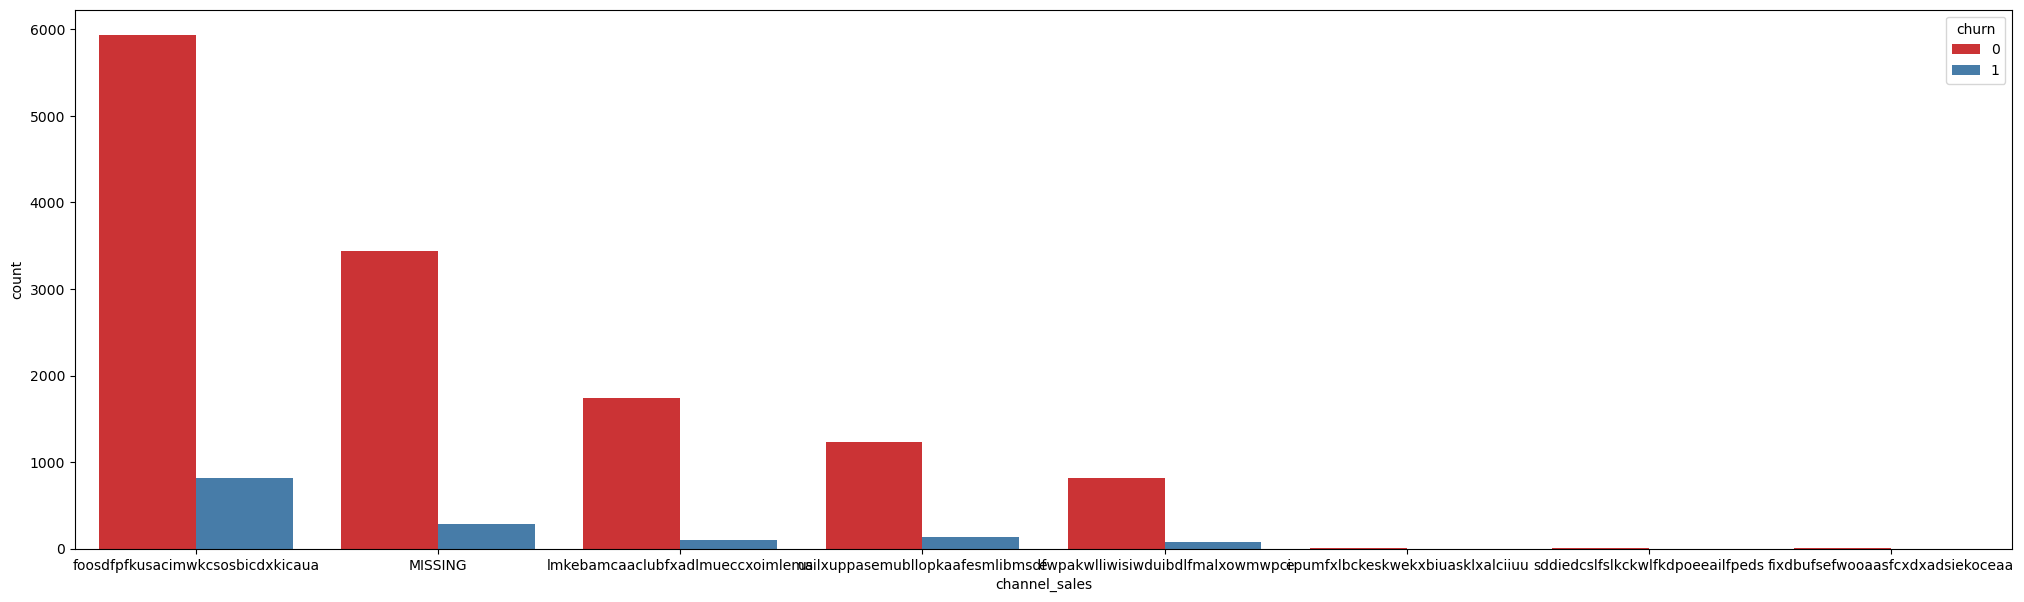

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='channel_sales',hue='churn',data=df,palette='Set1')

## Transforming Numerical Data
- Since our numerical data is highly skewed we can transform the data using several methods such as the Normalization, Sigmoid, Log, Square, Square Root, etc.
- We are going to apply transformer methods from scikit library. 

In [65]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
eda_df[skewed].describe().T



 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,159230.267032,573483.629064,0.0,5674.000000,14116.000000,40764.000000,6.207104e+06
cons_gas_12m,14605.0,28091.082506,162978.563803,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14605.0,16091.371448,64366.262314,0.0,0.000000,793.000000,3383.000000,7.712030e+05
forecast_cons_12m,14605.0,1868.638618,2387.651549,0.0,494.980000,1112.610000,2402.270000,8.290283e+04
forecast_cons_year,14605.0,1399.858747,3247.876793,0.0,0.000000,314.000000,1746.000000,1.753750e+05
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14605.0,63.090448,66.166636,0.0,16.180000,18.800000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [69]:
# def normalize(column):
#   upper = column.max()
#   lower = column.min()
#   y = (column - lower)/(upper-lower)
#   return y

# eda_df["cons_12m"] = normalize(eda_df["cons_12m"])
# eda_df["cons_gas_12m"] = normalize(["cons_gas_12m"])
# eda_df["cons_last_month"] = normalize(eda_df["cons_last_month"])
# eda_df["forecast_cons_12m"] = normalize(eda_df["forecast_cons_12m"])
# eda_df["forecast_cons_year"] = normalize(eda_df["forecast_cons_year"])
# eda_df["imp_cons"] = normalize(eda_df["imp_cons"])

#Log Function + 1

eda_df["cons_12m"] = np.log10(eda_df["cons_12m"] + 1)
eda_df["cons_gas_12m"] = np.log10(eda_df["cons_gas_12m"] + 1)
eda_df["cons_last_month"] = np.log10(eda_df["cons_last_month"] + 1)
eda_df["forecast_cons_12m"] = np.log10(eda_df["forecast_cons_12m"] + 1)
eda_df["forecast_cons_year"] = np.log10(eda_df["forecast_cons_year"] + 1)
eda_df["forecast_meter_rent_12m"] = np.log10(eda_df["forecast_meter_rent_12m"] + 1)
eda_df["imp_cons"] = np.log10(eda_df["imp_cons"] + 1)

In [71]:
eda_df[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,0.009666,0.031837,0.0,0.000397,0.000987,0.002843,0.301030
cons_gas_12m,14605.0,0.778978,1.716828,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,14605.0,2.264801,1.769266,0.0,0.000000,2.899821,3.529430,5.887169
forecast_cons_12m,14605.0,2.962162,0.683612,0.0,2.695464,3.046733,3.380803,4.918575
forecast_cons_year,14605.0,1.784733,1.584972,0.0,0.000000,2.498311,3.242293,5.243970
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,14605.0,1.517233,0.571489,0.0,1.235023,1.296665,2.120673,2.778376
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,0.273963
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,0.195975
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,59.266378


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

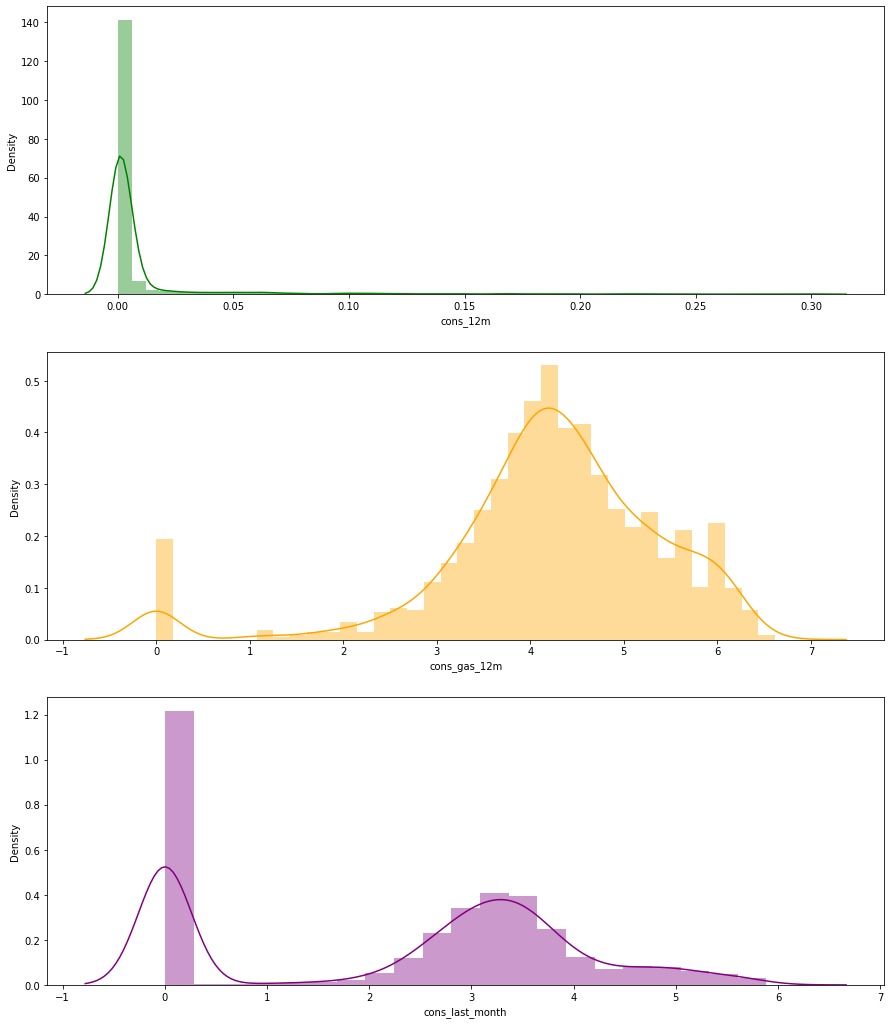

In [75]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((eda_df["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((eda_df[eda_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((eda_df["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

In [78]:
correlation = eda_df.corr()
correlation

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
Unnamed: 0,1.000000,-0.011780,-0.005982,0.011763,0.005881,0.019752,0.007593,0.006069,-0.001941,0.008970,...,0.000273,0.003069,-0.005820,0.009410,0.007300,-0.006340,-0.003817,0.001655,0.010239,-0.007035
cons_12m,-0.011780,1.000000,0.292551,0.448385,0.157111,-0.045944,0.057799,-0.009577,0.156547,-0.028122,...,0.126918,0.037358,-0.048197,-0.057083,-0.103198,0.333556,-0.084399,0.094828,-0.033028,-0.057790
cons_gas_12m,-0.005982,0.292551,1.000000,0.171315,0.108419,0.001321,0.063595,-0.042081,0.075586,-0.030429,...,0.019419,-0.005549,0.030662,-0.008139,-0.046636,0.048732,-0.013953,0.000544,0.001664,-0.003059
cons_last_month,0.011763,0.448385,0.171315,1.000000,0.292771,-0.015038,0.326319,-0.236868,0.396750,-0.162628,...,0.065127,0.069745,-0.058132,-0.066088,0.010873,0.205664,-0.111150,-0.031864,-0.023597,0.049610
forecast_cons_12m,0.005881,0.157111,0.108419,0.292771,1.000000,0.056037,0.222210,0.047915,0.220178,0.101441,...,-0.104531,0.095567,-0.099921,-0.006698,0.055941,0.081425,-0.034362,-0.031500,-0.020155,0.046164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
channel_lmkebamcaaclubfxadlmueccxoimlema,-0.006340,0.333556,0.048732,0.205664,0.081425,-0.052684,0.018280,0.011638,0.092456,-0.023257,...,0.130460,0.035489,-0.222358,-0.096979,-0.352421,1.000000,-0.122511,0.174761,0.083619,-0.227500
channel_usilxuppasemubllopkaafesmlibmsdf,-0.003817,-0.084399,-0.013953,-0.111150,-0.034362,0.033466,-0.062387,0.096717,-0.083167,0.055975,...,-0.126307,-0.042908,-0.188634,-0.082271,-0.298971,-0.122511,1.000000,0.056474,-0.095433,0.027181
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,0.001655,0.094828,0.000544,-0.031864,-0.031500,-0.059693,-0.058539,0.120598,-0.007851,0.064308,...,0.146704,-0.061244,0.155433,0.082453,-0.324167,0.174761,0.056474,1.000000,-0.338269,-0.627330
origin_up_ldkssxwpmemidmecebumciepifcamkci,0.010239,-0.033028,0.001664,-0.023597,-0.020155,-0.029611,0.053031,-0.081035,0.054021,-0.005941,...,0.118903,0.013264,0.268972,0.067080,-0.269702,0.083619,-0.095433,-0.338269,1.000000,-0.509563


In [80]:
eda_df = eda_df.drop(columns=['num_years_antig', 'forecast_cons_year'])
eda_df.head()

KeyError: ignored

In [87]:
eda_df = eda_df.drop(columns='Unnamed: 0')


In [88]:
eda_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,0.000326,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,0.000038,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,0.000111,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,0.000309,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [89]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14605 non-null  object 
 1   cons_12m                                    14605 non-null  float64
 2   cons_gas_12m                                14605 non-null  float64
 3   cons_last_month                             14605 non-null  float64
 4   forecast_cons_12m                           14605 non-null  float64
 5   forecast_discount_energy                    14605 non-null  float64
 6   forecast_meter_rent_12m                     14605 non-null  float64
 7   forecast_price_energy_off_peak              14605 non-null  float64
 8   forecast_price_energy_peak                  14605 non-null  float64
 9   forecast_price_pow_off_peak                 14605 non-null  float64
 10  has_gas   

## Train, validation, test datasets


In [117]:
import numpy as np
train_df = eda_df.copy()
X = eda_df.drop(columns=['id', 'churn'])
y = eda_df['churn']

X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,0.000326,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,0.000038,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,0.000111,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,0.000309,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,0.002252,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,...,7,19,0,0,1,0,0,0,0,1
14601,0.000505,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,0,...,40,4,0,0,1,0,0,0,0,1
14602,0.000129,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,...,46,10,0,0,1,0,0,0,0,1
14603,0.000009,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,0,...,40,4,0,0,1,0,0,0,0,1


In [118]:
print(X.shape)
print(y.shape)

(14605, 64)
(14605,)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 64)
(10953,)
(3652, 64)
(3652,)


In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [122]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## Model Evaluation
Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples
- ROC & AUC = It tells how much the model is capable of distinguishing between classes.
- K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9036144578313253

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.12       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.91      0.90      0.86      3652



[[3277    2]
 [ 350   23]]


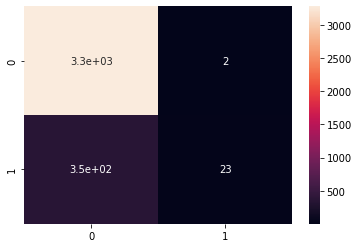

In [124]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [125]:
print("Precision Score is - ", precision_score(y_test, y_pred))
print("Recall Score is - ", recall_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

Precision Score is -  0.92
Recall Score is -  0.06166219839142091
AUC score:-  0.5305261281679581


In [127]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

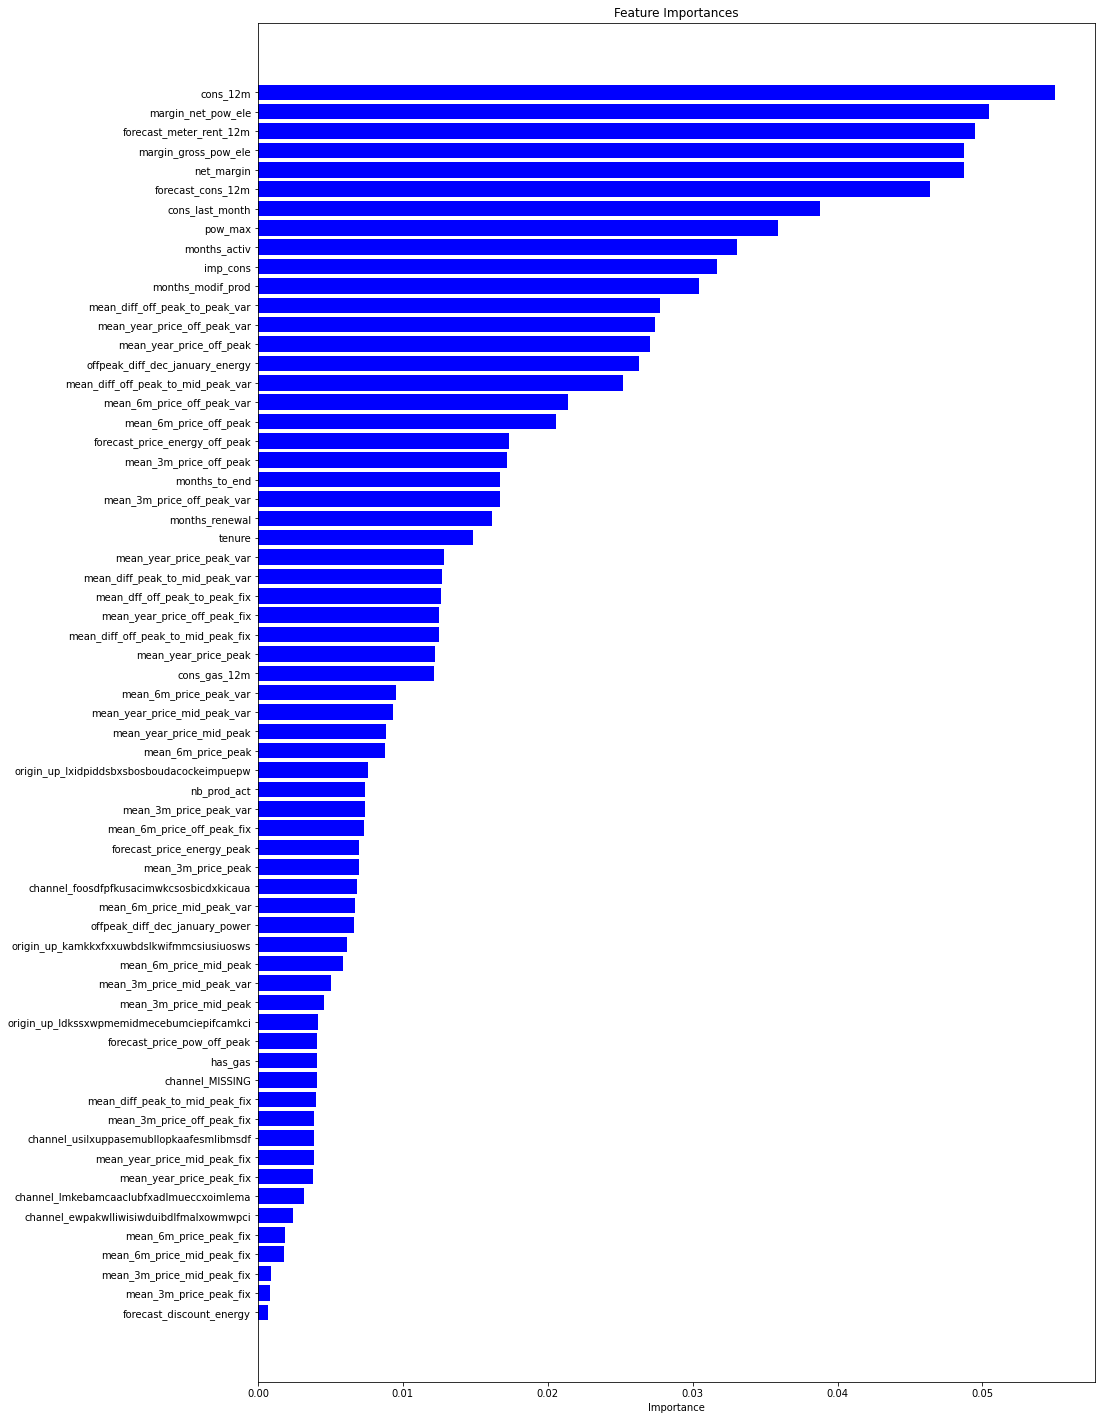

In [128]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='blue', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin on power subscription and consumption over 12 months is a top driver for churn in this model
- Forecasted bill of meter rental for the next 2 months also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

In [129]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [130]:
probabilities

array([0.555, 0.154, 0.008, ..., 0.029, 0.123, 0.099])

In [135]:
X_test



,level_0,index,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,4947,0.034145,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,...,35,0,0,0,1,0,0,0,0,1
1,1,5868,0.064962,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,...,67,7,0,0,0,1,0,0,1,0
2,2,6805,0.000000,0.000000,0.000000,0.000000,0.0,2.125774,0.092453,0.086393,...,90,0,1,0,0,0,0,0,1,0
3,3,1323,0.001547,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,...,0,10,0,0,1,0,0,0,0,1
4,4,11759,0.000111,0.000000,2.484300,2.523109,0.0,1.238548,0.141434,0.000000,...,5,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3647,6847,0.001227,3.256477,3.185542,3.253113,0.0,2.088313,0.116509,0.101397,...,7,0,0,0,0,0,1,0,0,1
3648,3648,4125,0.000500,0.000000,3.280123,0.000000,0.0,0.000000,0.000600,0.000000,...,105,0,1,0,0,0,0,0,0,1
3649,3649,11050,0.002111,4.863531,3.423574,3.478985,0.0,2.121822,0.115237,0.100123,...,13,0,0,0,1,0,0,1,0,0
3650,3650,591,0.000598,3.509874,2.352183,2.914845,0.0,1.288249,0.140621,0.000000,...,42,6,0,0,0,1,0,0,0,1


In [136]:
X_test.drop(columns='index', inplace=True)


In [137]:
X_test

,level_0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,0.034145,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,40.606701,...,35,0,0,0,1,0,0,0,0,1
1,1,0.064962,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,44.311378,...,67,7,0,0,0,1,0,0,1,0
2,2,0.000000,0.000000,0.000000,0.000000,0.0,2.125774,0.092453,0.086393,59.173468,...,90,0,1,0,0,0,0,0,1,0
3,3,0.001547,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,...,0,10,0,0,1,0,0,0,0,1
4,4,0.000111,0.000000,2.484300,2.523109,0.0,1.238548,0.141434,0.000000,44.311378,...,5,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3647,0.001227,3.256477,3.185542,3.253113,0.0,2.088313,0.116509,0.101397,40.606701,...,7,0,0,0,0,0,1,0,0,1
3648,3648,0.000500,0.000000,3.280123,0.000000,0.0,0.000000,0.000600,0.000000,0.000000,...,105,0,1,0,0,0,0,0,0,1
3649,3649,0.002111,4.863531,3.423574,3.478985,0.0,2.121822,0.115237,0.100123,40.606701,...,13,0,0,0,1,0,0,1,0,0
3650,3650,0.000598,3.509874,2.352183,2.914845,0.0,1.288249,0.140621,0.000000,44.311378,...,42,6,0,0,0,1,0,0,0,1


In [138]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

In [141]:
X_test[['churn', 'churn_probability']]

,churn,churn_probability
0,1,0.555
1,0,0.154
2,0,0.008
3,0,0.120
4,0,0.160
...,...,...
3647,0,0.030
3648,0,0.000
3649,0,0.029
3650,0,0.123
